In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('Customer Churn.csv')

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


The datatype of `TotalCharges` is object. <br>
After checking in excel we came to know that in certain rows where the `tenure` is 0 naturally `TotalCharges` is also 0. <br>
If the user has used the services for 0 days then naturally the bill will aslo be 0. <br>
But in excel we came to know that these empty cells have a whitespace:`" "` entered in them instead of keeping them empty. <br>
That is the reason we cannot see any null values in the output given above while actually null values are present. <br>

So now we will replace these `whitespaces` with `0`

In [5]:
df['TotalCharges'] = df['TotalCharges'].replace(" ", 0)
df['TotalCharges'] = df['TotalCharges'].astype('float')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Null Values

In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

There are no null values in this dataset.

In [8]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


## Duplicate Values

In [9]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
7038    False
7039    False
7040    False
7041    False
7042    False
Length: 7043, dtype: bool

In [10]:
df['customerID'].duplicated().sum()

np.int64(0)

There are no duplicate values in this dataset.

Look at the column: Senior Citizen. This column tells us whether the person is a senior citizen or not, but the values are given in 0's and 1's. It will be better if we convert these values into Yes and No.

So now lets write a function which converts 1 into Yes and 0 into no.

In [11]:
def conv(value):
    if value == 1:
        return 'Yes'
    else:
        return 'No'

In [12]:
df['SeniorCitizen'] = df['SeniorCitizen'].apply(conv)

In [13]:
df['SeniorCitizen']

0        No
1        No
2        No
3        No
4        No
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: SeniorCitizen, Length: 7043, dtype: object

# Exploratory Data Analysis

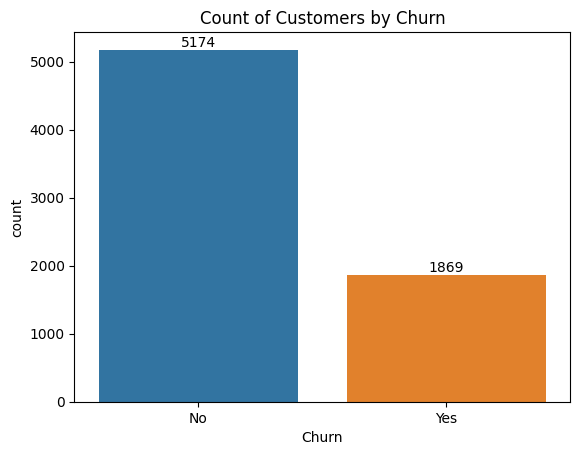

In [14]:
ax = sns.countplot(x='Churn', hue='Churn', data=df)

for bars in ax.containers:
    ax.bar_label(bars)

plt.title('Count of Customers by Churn');

In [15]:
gb = df.groupby(['Churn'])['customerID'].count()

In [16]:
gb

Churn
No     5174
Yes    1869
Name: customerID, dtype: int64

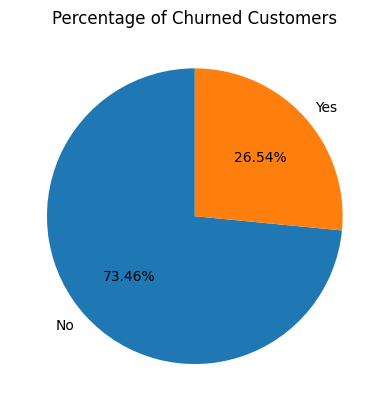

In [17]:
plt.pie(gb, labels=gb.index, autopct='%1.2f%%', startangle=90)
plt.title('Percentage of Churned Customers');

- From the above pie chart we can see that 26.54% of customers have churned out. We will now try to explore the reason behind it

## Senior Citizen

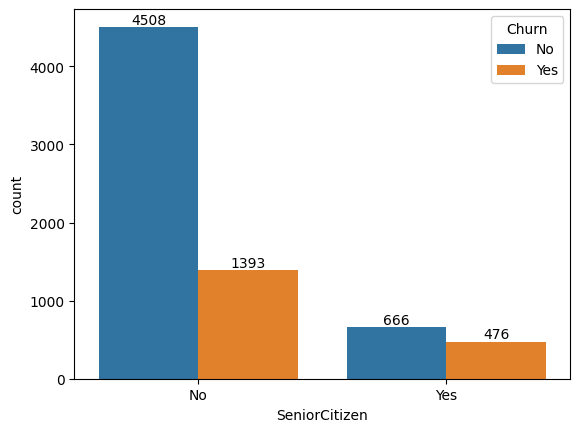

In [18]:
ax = sns.countplot(x='SeniorCitizen', hue='Churn', data=df)

for bars in ax.containers:
    ax.bar_label(bars)

### Conversion of Count into Percentage

In [19]:
df.groupby(['SeniorCitizen', 'Churn']).size().unstack()

Churn,No,Yes
SeniorCitizen,,
No,4508,1393
Yes,666,476


In [20]:
df_senior_citizen = df.groupby(['SeniorCitizen', 'Churn']).size().unstack()

In [21]:
df_senior_citizen.sum(axis=1)

SeniorCitizen
No     5901
Yes    1142
dtype: int64

In [22]:
df_senior_citizen.sum()

Churn
No     5174
Yes    1869
dtype: int64

In [23]:
df_senior_citizen['total'] = df_senior_citizen.sum(axis=1)

In [24]:
df_senior_citizen

Churn,No,Yes,total
SeniorCitizen,,,
No,4508,1393,5901
Yes,666,476,1142


In [25]:
df_senior_citizen['Yes'] * 100/ df_senior_citizen['total']

SeniorCitizen
No     23.606168
Yes    41.681261
dtype: float64

In [26]:
df_senior_citizen['Churn_Yes'] = round(df_senior_citizen['Yes'] * 100/ df_senior_citizen['total'], 2)

In [27]:
df_senior_citizen

Churn,No,Yes,total,Churn_Yes
SeniorCitizen,,,,
No,4508,1393,5901,23.61
Yes,666,476,1142,41.68


In [28]:
round(df_senior_citizen['No'] * 100/ df_senior_citizen['total'], 2)

SeniorCitizen
No     76.39
Yes    58.32
dtype: float64

In [29]:
df_senior_citizen['Churn_No'] = round(df_senior_citizen['No'] * 100/ df_senior_citizen['total'], 2)

In [30]:
df_senior_citizen

Churn,No,Yes,total,Churn_Yes,Churn_No
SeniorCitizen,,,,,
No,4508,1393,5901,23.61,76.39
Yes,666,476,1142,41.68,58.32


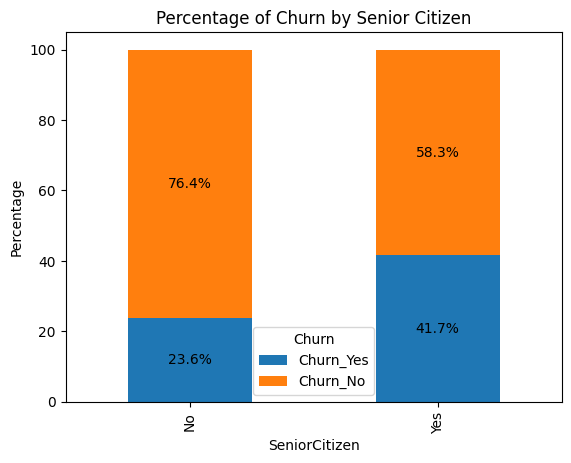

In [31]:
ax = df_senior_citizen[['Churn_Yes', 'Churn_No']].plot(kind='bar', stacked=True)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center')

plt.ylabel('Percentage')
plt.title('Percentage of Churn by Senior Citizen');

- People who are from the `Senior Citizen` category are more likely to churn out.

## Tenure

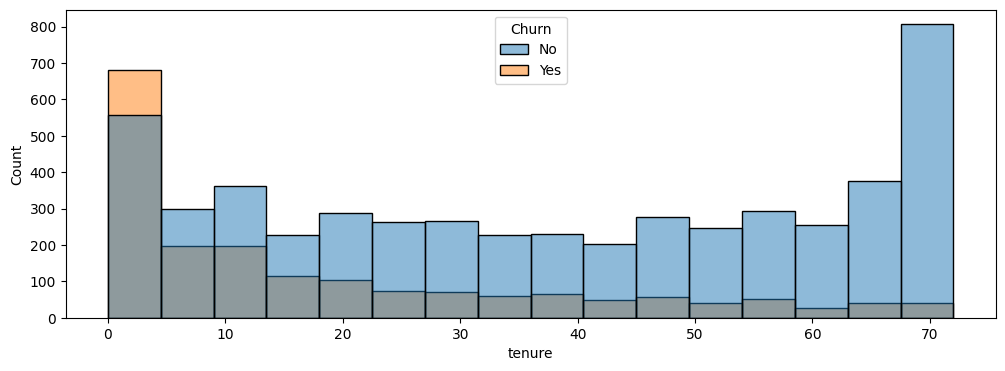

In [32]:
plt.figure(figsize=(12,4))
sns.histplot(x='tenure', data=df, hue='Churn');

- People who have used telecom services for a longer period of time are more likely to stay. 
- People who have used telecom services for shorter period of time (1 or 2 months) have churned out.

## Contract

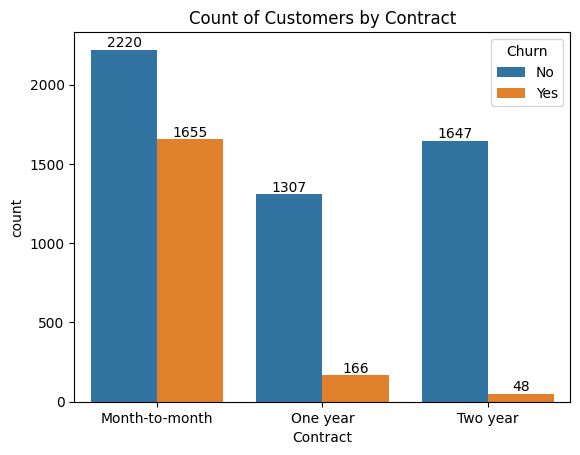

In [33]:
ax = sns.countplot(x='Contract', data=df, hue='Churn')

for bars in ax.containers:
    ax.bar_label(bars)

plt.title('Count of Customers by Contract');

- People who have a `month-to-month` contract are more likely to churn out than those who have one year or two year contract.

## Partner

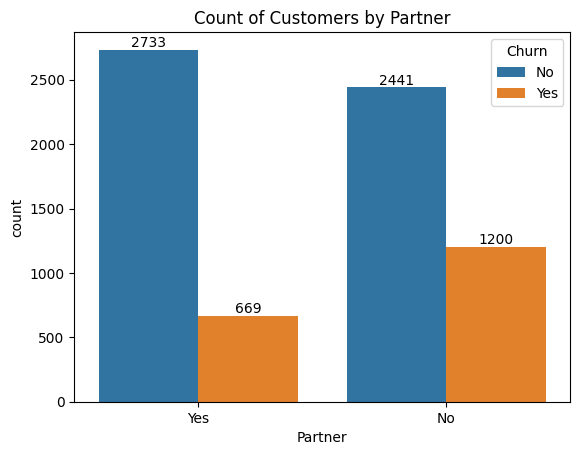

In [34]:
ax = sns.countplot(x='Partner', data=df, hue='Churn')

for bars in ax.containers:
    ax.bar_label(bars)

plt.title('Count of Customers by Partner');

- Customers who dont have `partners` are more likely to churn out

## Phone Service

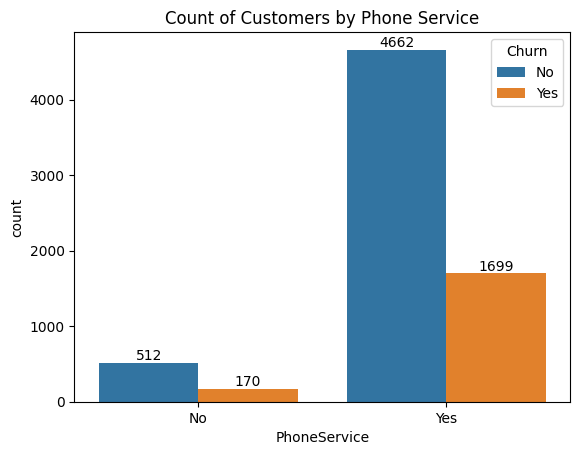

In [35]:
ax = sns.countplot(x='PhoneService', data=df, hue='Churn')

for bars in ax.containers:
    ax.bar_label(bars)

plt.title('Count of Customers by Phone Service');

- People who have subscribed to the phone service are more likely to churn out than the people who have not.

## Multiple Lines

In [36]:
df_multiple_lines = df[df.MultipleLines.isin(['Yes', 'No'])]

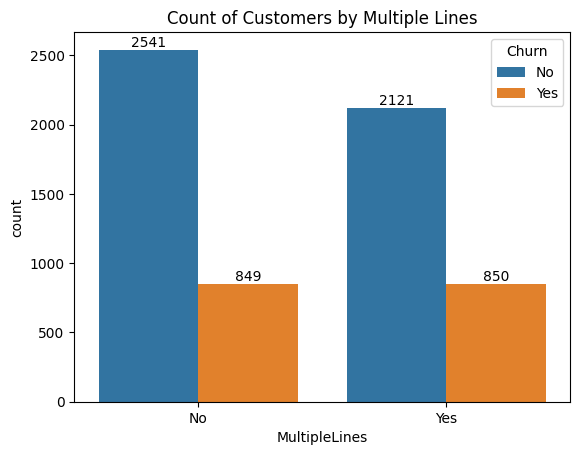

In [37]:
ax = sns.countplot(x='MultipleLines', data=df_multiple_lines, hue='Churn')

for bars in ax.containers:
    ax.bar_label(bars)

plt.title('Count of Customers by Multiple Lines');

**Function to convert count to percentage**

In [38]:
def convert_to_percentage(value):
    df_pct = df.groupby([value, 'Churn']).size().unstack()
    df_pct['total'] = df_pct.sum(axis=1)
    df_pct['Churn_Yes'] = round(df_pct['Yes'] * 100 / df_pct['total'], 2)
    df_pct['Churn_No'] = round(df_pct['No'] * 100 / df_pct['total'], 2)
    return df_pct[['Churn_No', 'Churn_Yes']]

In [39]:
convert_to_percentage(df_multiple_lines['MultipleLines'])

Churn,Churn_No,Churn_Yes
MultipleLines,,
No,74.96,25.04
Yes,71.39,28.61


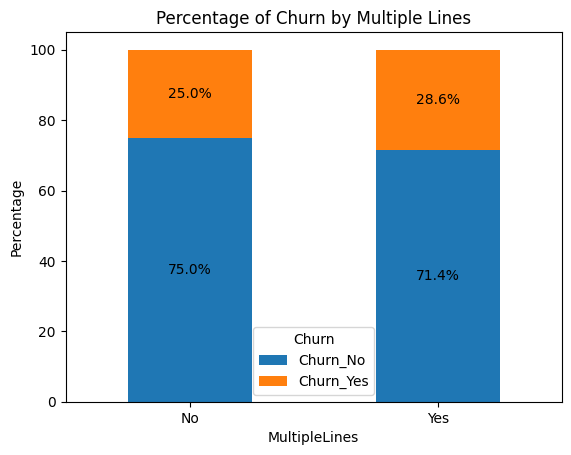

In [40]:
ax = convert_to_percentage(df_multiple_lines['MultipleLines']).plot(kind='bar', stacked=True)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center')

plt.xticks(rotation=0)
plt.ylabel('Percentage')
plt.title('Percentage of Churn by Multiple Lines');

25% of the people who do not use multiple lines have churned out. <br>
28.6% of the people who use multiple lines have churned out. <br><br>
 
Big difference does not exist in percentage of people who have churned out who use multiple lines and the ones who dont. <br>
But from the percentages we can also conclude that the people who use multiple lines are more likely to churn out than the rest. <br>

## Internet Service

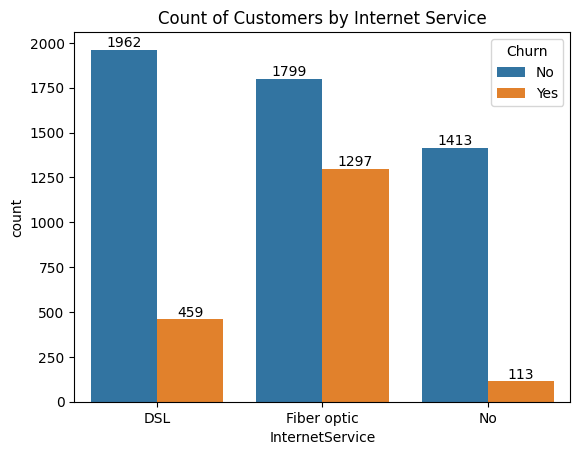

In [41]:
ax = sns.countplot(x='InternetService', data=df, hue='Churn')

for bars in ax.containers:
    ax.bar_label(bars)

plt.title('Count of Customers by Internet Service');

- A `very large portion` of people who had opted for `Fiber Optic Internet Service` have churned out.

In [42]:
convert_to_percentage(df['InternetService'])

Churn,Churn_No,Churn_Yes
InternetService,,
DSL,81.04,18.96
Fiber optic,58.11,41.89
No,92.60,7.40


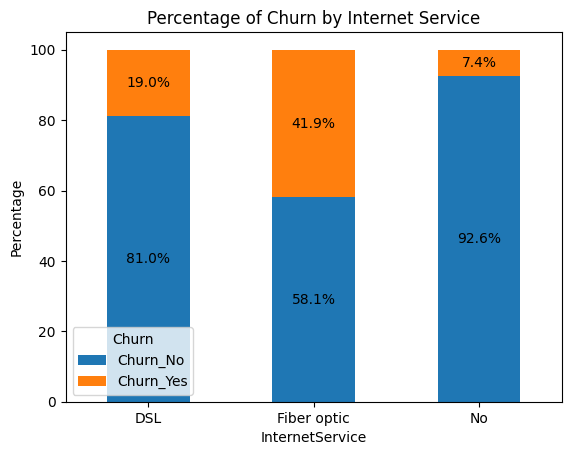

In [43]:
ax = convert_to_percentage(df['InternetService']).plot(kind='bar', stacked=True)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center')

plt.xticks(rotation=0)
plt.ylabel('Percentage')
plt.title('Percentage of Churn by Internet Service');

- 19% of the people who had opted for DSL have churned. This is slightly better as compared to the percentage of Fiber Optic Internet Service.
- Very few people who did not apply for any internet service have churned out.

## Online Security

In [44]:
df_online_security = df[df.OnlineSecurity.isin(['Yes', 'No'])]

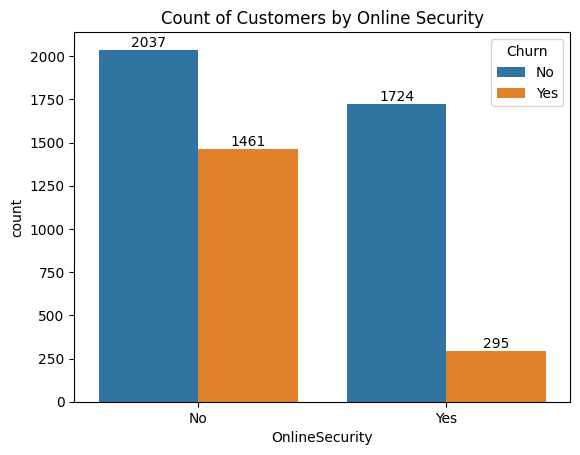

In [45]:
ax = sns.countplot(x='OnlineSecurity', data=df_online_security, hue='Churn')

for bars in ax.containers:
    ax.bar_label(bars)

plt.title('Count of Customers by Online Security');

- A very huge portion of people how did not subscribe to the Online Security Service churned out.
- A very low percentage of people who subscribed to the Online Security Service churned out.

## Online Backup

In [46]:
df_online_backup = df[df.OnlineBackup.isin(['Yes', 'No'])]

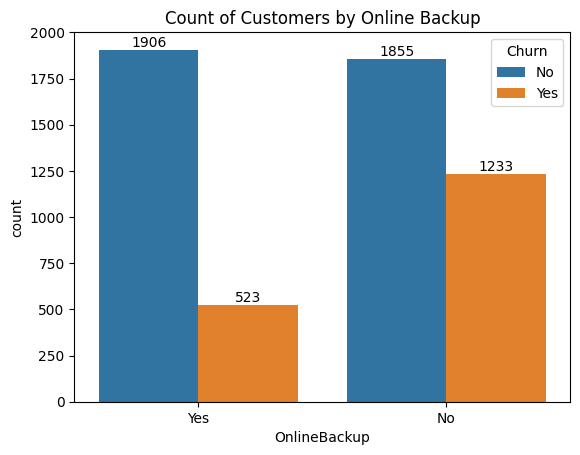

In [47]:
ax = sns.countplot(x='OnlineBackup', data=df_online_backup, hue='Churn')

for bars in ax.containers:
    ax.bar_label(bars)

plt.title('Count of Customers by Online Backup');

- The people who have not takes Online Backup service are more likely to churn out than the people who have not.

## Device Protection

In [48]:
df_device_protection = df[df.DeviceProtection.isin(['Yes', 'No'])]

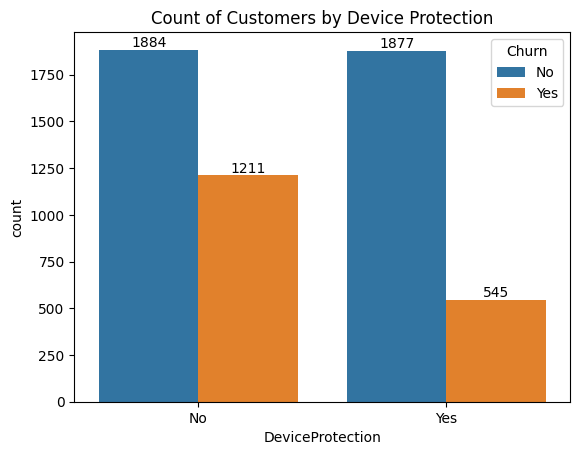

In [49]:
ax = sns.countplot(x='DeviceProtection', data=df_device_protection, hue='Churn')

for bars in ax.containers:
    ax.bar_label(bars)

plt.title('Count of Customers by Device Protection');

- The people who did not take Device Protection service are more likely to churn out.

## Tech Support

In [50]:
df_tech_support = df[df.TechSupport.isin(['Yes', 'No'])]

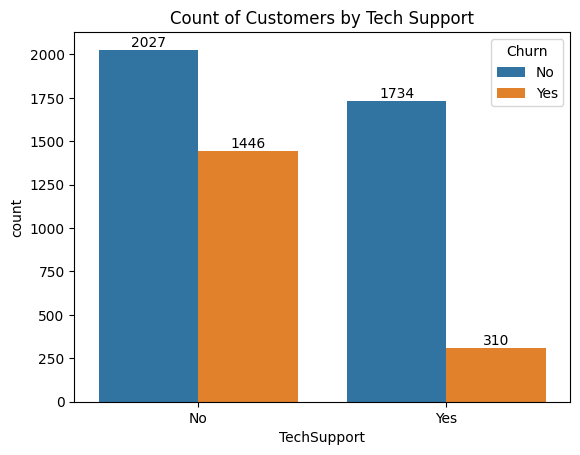

In [51]:
ax = sns.countplot(x='TechSupport', data=df_tech_support, hue='Churn')

for bars in ax.containers:
    ax.bar_label(bars)

plt.title('Count of Customers by Tech Support');

- The people who did not take Tech Support are more likely to churn out.

## Streaming TV

In [52]:
df_streaming_TV = df[df.StreamingTV.isin(['Yes', 'No'])]

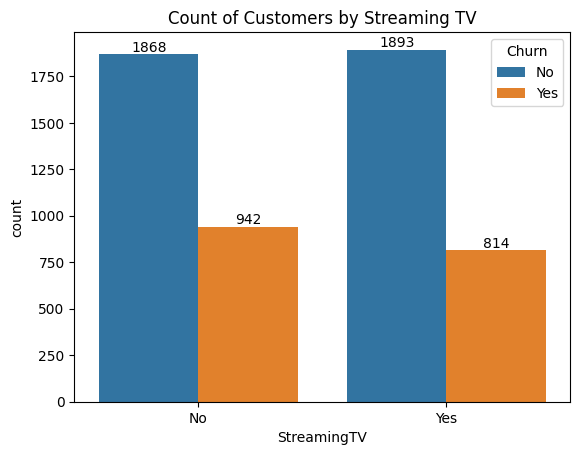

In [53]:
ax = sns.countplot(x='StreamingTV', data=df_streaming_TV, hue='Churn')

for bars in ax.containers:
    ax.bar_label(bars)

plt.title('Count of Customers by Streaming TV');

In [54]:
convert_to_percentage(df_streaming_TV['StreamingTV'])

Churn,Churn_No,Churn_Yes
StreamingTV,,
No,66.48,33.52
Yes,69.93,30.07


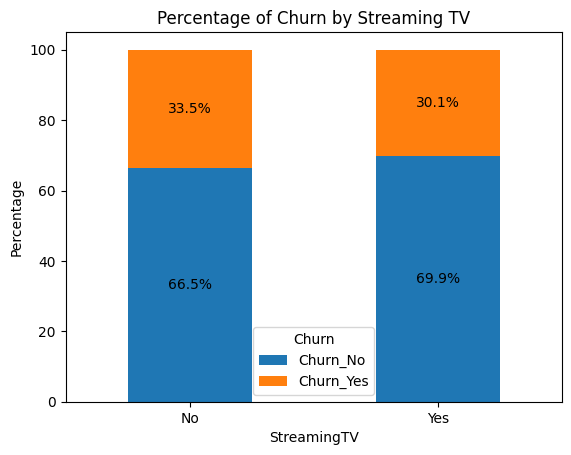

In [55]:
ax = convert_to_percentage(df_streaming_TV['StreamingTV']).plot(kind='bar', stacked=True)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center')

plt.xticks(rotation=0)
plt.ylabel('Percentage')
plt.title('Percentage of Churn by Streaming TV');

33.5% of the people who did not subscribe to StreamingTV churned out.
30% of the people who subscribed to StreamingTV churned out.

I don't think that big differece exists upon which we can consider StramingTV as a factor on the basis of which we can conclude whether people will churn out or stay. Still if we were to look at the percentages people who have subscribed to StremingTV are less likely to churn out.

## Streaming Movies

In [56]:
df_streaming_movies = df[df.StreamingMovies.isin(['Yes', 'No'])]

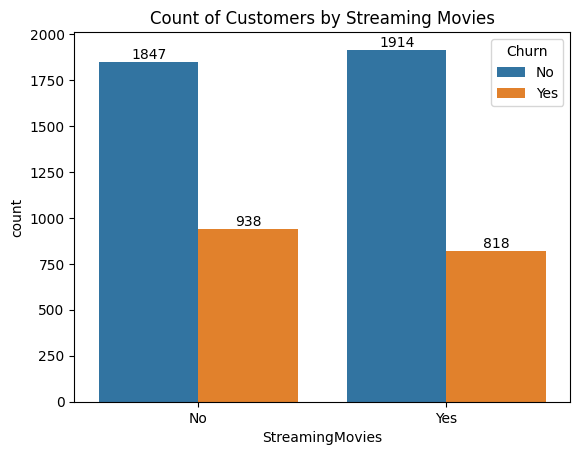

In [57]:
ax = sns.countplot(x='StreamingMovies', data=df_streaming_movies, hue='Churn')

for bars in ax.containers:
    ax.bar_label(bars)

plt.title('Count of Customers by Streaming Movies');

In [58]:
convert_to_percentage(df_streaming_movies['StreamingMovies'])

Churn,Churn_No,Churn_Yes
StreamingMovies,,
No,66.32,33.68
Yes,70.06,29.94


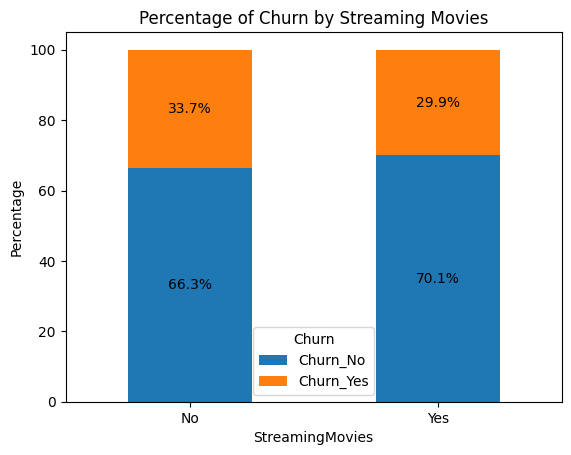

In [59]:
ax = convert_to_percentage(df_streaming_movies['StreamingMovies']).plot(kind='bar', stacked=True)

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center')

plt.xticks(rotation=0)
plt.ylabel('Percentage')
plt.title('Percentage of Churn by Streaming Movies');

33.7% of the people who did not subscribe to StreamingMovies churned out.
29.9% of the people who subscribed to StreamingMovies churned out.

I don't think that big differece exists upon which we can consider StramingMovies as a factor on the basis of which we can conclude whether people will churn out or stay. Still if we were to look at the percentages people who have subscribed to StremingMovies are less likely to churn out.

## Paperless Billing

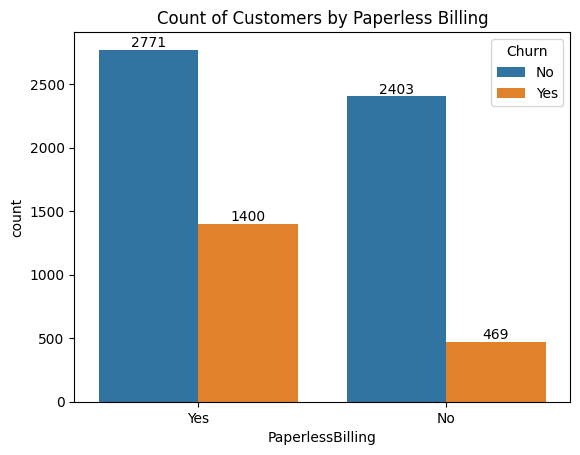

In [60]:
ax = sns.countplot(x='PaperlessBilling', data=df, hue='Churn')

for bars in ax.containers:
    ax.bar_label(bars)

plt.title('Count of Customers by Paperless Billing');

- People who have subscribed to Paperless Billing are more likely to churn out.

## Payment Method

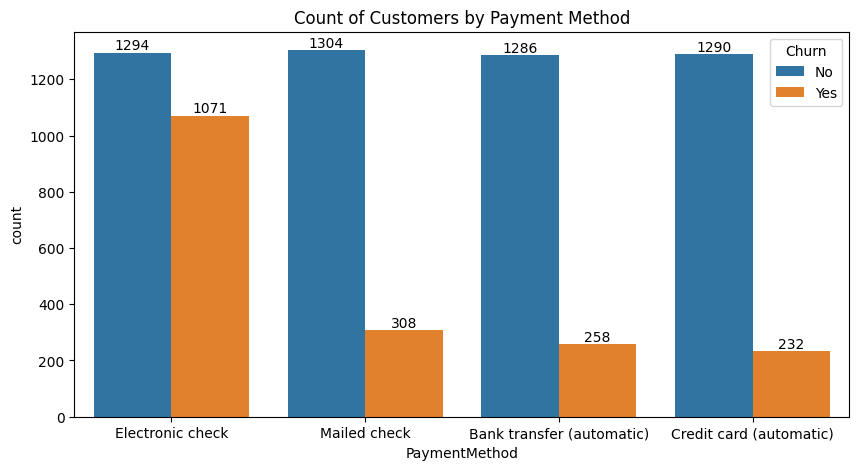

In [61]:
plt.figure(figsize=(10, 5))
ax = sns.countplot(x='PaymentMethod', data=df, hue='Churn')

for bars in ax.containers:
    ax.bar_label(bars)

plt.title('Count of Customers by Payment Method');

- People who have chosen the `Electronic Check` payment method of Payment are `more likely to churn out` as compared to other payment methods.

# Inferences and Conclusion

### Customer Tenure and Churn:

- **Longer-term Customers**: Customers who have been with the company for a significant period are less likely to churn.
- **Short-term Customers**: Customers who have been with the company for a short period (1-2 months) are more prone to churn.

### Contract Type and Churn:

- **Month-to-Month Contracts**: Customers on month-to-month contracts are more likely to churn compared to those on annual or two-year contracts.

### Demographic Factors and Churn:

- **Senior Citizens**: Senior citizens are more likely to churn.

### Service Usage and Churn:

- **Phone Service**: Customers with phone service are more likely to churn.
- **Multiple Lines**: While the difference is subtle, customers with multiple lines are slightly more likely to churn (28.6%) compared to those without (25%).

### Internet Service:

- **Fiber Optic Internet Service**: A significant portion (41.9%) of customers with Fiber Optic internet service have churned.
- **DSL Internet Service**: A smaller portion (19%) of customers with DSL internet service have churned.

### Additional Services:
- **Online Security**: Customers who do not subscribe to Online Security are significantly more likely to churn.
- **Online Backup**: Customers who do not subscribe to Online Backup are more likely to churn.
- **Device Protection**: Customers who do not subscribe to Device Protection are more likely to churn.
- **Tech Support**: Customers who do not subscribe to Tech Support are more likely to churn.
- **Streaming TV**: While the difference is not significant, customers who subscribe to Streaming TV are slightly less likely to churn (30%) compared to those who don't (33.5%).
- **Streaming Movies**: While the difference is not significant, customers who subscribe to Streaming Movies are slightly less likely to churn (29.9%) compared to those who don't (33.7%).

### Billing and Payment Factors:

- **Paperless Billing**: Customers who have opted for paperless billing are more likely to churn.
- **Payment Method**: Customers who pay via Electronic Check are more likely to churn compared to other payment methods.

# Suggestions for Improving Services

### Customer Tenure and Churn:

- The company can offer `Introductory Deals` and emphasize on `Long Term Benefits` of staying with the company.

### Demographic Factors:

- The company should tailor its services and communication to the specific needs of senior citizens, perhaps by offering `Dedicated Plans` or `Dedicated Customer Support`.

### Service Usage and Churn:

- The company should analyze the reasons why customers with phone service are more likely to churn and take steps to address these issues, such as `Improving Service Quality`, `Improving Voice Quality`, `Improving Range of Signals`, etc.

### Internet Service:

- Fiber Optic internet service is the most popular among cutomers nowadays because of the high speed of internet service it offers. People will most likely buy Fiber Optic Internet connections if they want a reliable internet service. My analysis strongly recommends `Improvement in Fiber Optic Internet Service` that the company offers.

### Additional Services:

- I strongly recommend to `Spread More Awareness` regarding `Online Security`, `Online Backup` and `Device Protection` as people who have subscribed to these services are more likely to stay with the company.
- My analysis states that the company should `Improve` its `Technical Support`.

### Billing and Payment:

- I do recommend to improve the Paperless Billing services as the people who are using the paperless billing service are more likely to churn out.
- `Improving Electronic Check Payment Method` is `Recommended` as the customers who use electronic check are more likely to churn out.

### Contract Type and Churn:

- `Improve Overall Performance` of the services which will make the customers stay for a longer period of time.